# Trabalhando com Planilhas do Excel e Datas

In [4]:
import pandas as pd 

In [5]:
df1 = pd.read_excel("C:/Users/Discover/Documents/LUCAS MARTINS/Python/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx")
df2 = pd.read_excel("C:/Users/Discover/Documents/LUCAS MARTINS/Python/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("C:/Users/Discover/Documents/LUCAS MARTINS/Python/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx")
df4 = pd.read_excel("C:/Users/Discover/Documents/LUCAS MARTINS/Python/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx")
df5 = pd.read_excel("C:/Users/Discover/Documents/LUCAS MARTINS/Python/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx")

In [6]:
# Mesma estrutura
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
# concatenar dfs
df = pd.concat([df1,df2,df3,df4,df5])

In [8]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [9]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [10]:
# Amostra do conjunto
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
158,Natal,2019-01-02,183.64,1037,3
223,Natal,2019-01-02,40.51,1037,2
134,Natal,2019-01-02,125.90,1036,1
209,Natal,2019-01-02,69.98,1034,2
133,Recife,2019-03-02,14.67,980,7


In [11]:
# Tipo de dados
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [12]:
# converter o tipo de dado
df["LojaID"] = df["LojaID"].astype("object")

In [13]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [14]:
# Verificar valores nulos
df.isnull().sum()

Cidade     0
Data       0
Vendas    11
LojaID     0
Qtde       0
dtype: int64

In [15]:
# Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [16]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [17]:
# Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [18]:
# Apagando as linhas nulas
df.dropna(subset=["Vendas"], inplace=True)

In [19]:
# Removendo linhas q tenha valores faltantes
df.dropna(how="all", inplace=True)

In [20]:
# Criando colunas
# Receita = vendas X qtd
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [21]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [22]:
# Criar coluna sem a coluna qntd
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [23]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [24]:
# Retornar maior receita
df["Receita"].max()

3544.0

In [25]:
# Menor receita
df["Receita"].min()

3.34

In [26]:
# Top 3 com base na coluna receita com maior receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [27]:
# Top 3 com pior receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [28]:
# Agrupar a soma da receita por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25000
Fortaleza     37913.97000
Natal        152307.75692
Recife        51936.51000
Salvador      40596.73000
Name: Receita, dtype: float64

In [29]:
# Ordenar o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0
70,Natal,2019-02-14,743.0,854,4,2972.0,4.0


# Trabalhando com Datas

In [31]:
# Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [33]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [35]:
# Transformando em data
df["Data"] = pd.to_datetime(df["Data"])

In [36]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [37]:
# Agrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    109957.37581
2019    221545.84111
Name: Receita, dtype: float64

In [38]:
# Criar uma coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
1,Fortaleza,2019-01-01,115.61,1002,3,346.83,3.0,2019
79,Recife,2019-01-01,14.53,983,6,87.18,6.0,2019
24,Natal,2018-04-22,868.00,854,3,2604.00,3.0,2018
36,Recife,2019-01-01,146.62,983,6,879.72,6.0,2019
128,Natal,2019-01-02,36.84,1034,1,36.84,1.0,2019


In [42]:
# Extraindo mes e dia da venda
df["Mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [43]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,dia_venda
178,Salvador,2019-01-02,39.28,1037,3,117.84,3.0,2019,1,2
10,Salvador,2019-01-01,30.97,1036,1,30.97,1.0,2019,1,1
100,Natal,2019-01-02,190.97,1036,2,381.94,2.0,2019,1,2
212,Salvador,2019-01-02,50.73,1037,3,152.19,3.0,2019,1,2
163,Natal,2019-01-02,17.66,1036,3,52.98,3.0,2019,1,2


In [44]:
# retornar data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [45]:
# Calulando diferença de dias
df["Diferenca_dias"] = df["Data"] - df["Data"].min()

In [46]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,dia_venda,Diferenca_dias
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1,0 days
46,Recife,2019-01-01,239.17,981,8,1913.36,8.0,2019,1,1,365 days
212,Salvador,2019-01-02,50.73,1037,3,152.19,3.0,2019,1,2,366 days
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days
106,Aracaju,2018-01-01,16.32,1520,7,114.24,7.0,2018,1,1,0 days


In [47]:
# Criando coluna de trimestre
df["Trimestre_venda"] = df["Data"].dt.quarter

In [48]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,dia_venda,Diferenca_dias,Trimestre_venda
123,Fortaleza,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1
36,Fortaleza,2019-01-01,36.31,1004,2,72.62,2.0,2019,1,1,365 days,1
116,Recife,2019-03-02,79.10,982,2,158.20,2.0,2019,3,2,425 days,1
105,Natal,2019-01-02,32.83,1037,1,32.83,1.0,2019,1,2,366 days,1
183,Salvador,2019-01-02,120.23,1037,2,240.46,2.0,2019,1,2,366 days,1


In [49]:
# Filtrando as vendas de 2010 do mês de março
venda_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [51]:
venda_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,dia_venda,Diferenca_dias,Trimestre_venda
135,Salvador,2019-03-02,9.95,1037,3,29.85,3.0,2019,3,2,425 days,1
117,Recife,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1
125,Recife,2019-03-02,37.60,983,4,150.40,4.0,2019,3,2,425 days,1
123,Recife,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1
46,Natal,2019-03-26,753.00,853,2,1506.00,2.0,2019,3,26,449 days,1
123,Salvador,2019-03-02,127.45,1036,3,382.35,3.0,2019,3,2,425 days,1
114,Salvador,2019-03-02,25.52,1034,1,25.52,1.0,2019,3,2,425 days,1
122,Salvador,2019-03-02,13.27,1037,1,13.27,1.0,2019,3,2,425 days,1
116,Recife,2019-03-02,79.10,982,2,158.20,2.0,2019,3,2,425 days,1
7,Natal,2019-03-18,886.00,853,4,3544.00,4.0,2019,3,18,441 days,1


# Visualização de dados

In [53]:
# contas quantas linhas de uma variavel
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

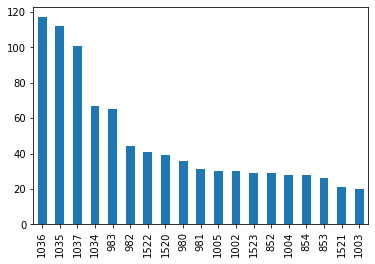

In [59]:
# Plotando grafico de barras vertical
df["LojaID"].value_counts(ascending=False).plot.bar();

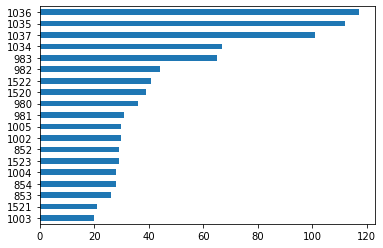

In [58]:
# Plotando grafico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

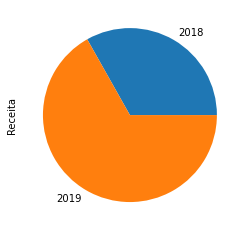

In [62]:
# Agrupando e plotando em pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [63]:
# Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

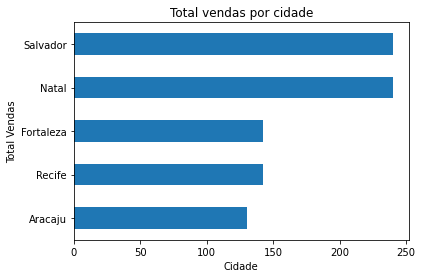

In [68]:
# Adicionanto titulo e alterando nome dos eitos
import matplotlib.pyplot as plt

df["Cidade"].value_counts(ascending=True).plot.barh(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

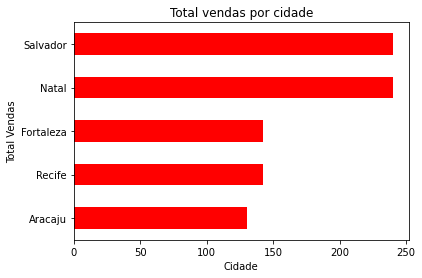

In [69]:
# Alterar a cor
df["Cidade"].value_counts(ascending=True).plot.barh(title="Total vendas por cidade", color = "red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [70]:
# Alterar estilo
#matplotlib.org
plt.style.use("ggplot")

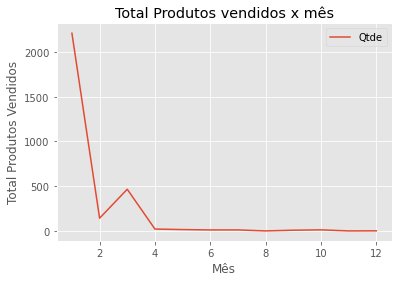

In [74]:
df.groupby(df["Mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [76]:
df.groupby(df["Mes_venda"])["Qtde"].sum()

Mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [78]:
# Selecionar apenas vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [83]:
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum()

Mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

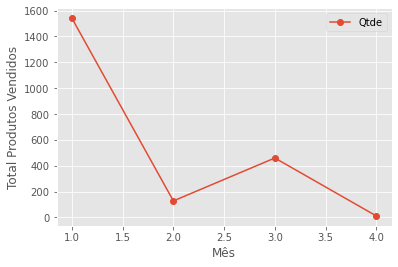

In [82]:
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

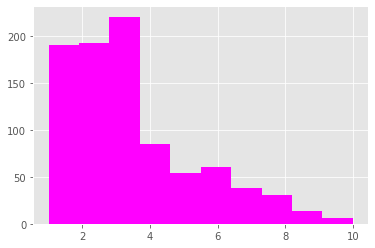

In [84]:
# plotando histograma
plt.hist(df["Qtde"], color = "magenta");

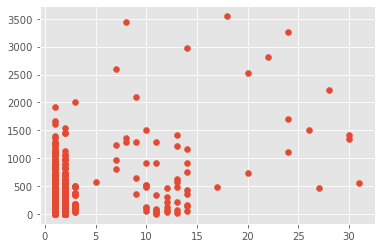

In [87]:
# grafico de disperção
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

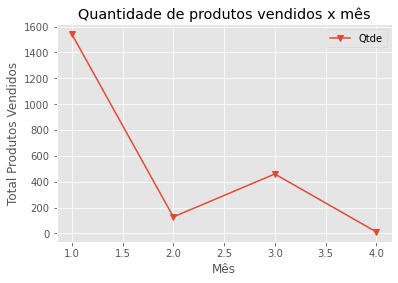

In [91]:
# Salvando grafico em png
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();
plt.savefig("grafico QTDE x Mês.png")